Data Science and Machine Learning Exploritory Analysis <br> <br>
This notebook seeks to use a survey data from the [2020 Kaggle Machine Learning & Data Science Survey kaggle contest](https://www.kaggle.com/c/kaggle-survey-2020/overview) to find the best way to get a in the field. <br>

The industry-wide survey was live for 3.5 weeks in October, and captured 20,036 responses.

I am a South African / Dutch data scientist working about to start my first graduate role in data science so I would like to compare the two countries to determine which languages, environments, and machine learning libraries I should be most familiar with to be best situated to get the best data science role if I do not end up working at the company which I am will be working for after the graduate program.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
np.random.seed(101)

from helper2 import * 
#I have placed most of the code in helper functions
# to keep the notebook clean.

In [3]:
df = pd.read_csv('kaggle_survey_2020_responses.csv')

C:\Users\Jonathan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
for col, i in zip(df.columns,range(df.shape[1])):
    #print(col," : ",df.iloc[0, i])
    for x in df.iloc[0, i].split(' '):
        if x.lower() == 'machine':
            print(col," : ",df.iloc[0, i])
            break

Q15  :  For how many years have you used machine learning methods?
Q16_Part_1  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn 
Q16_Part_2  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   TensorFlow 
Q16_Part_3  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Keras 
Q16_Part_4  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch 
Q16_Part_5  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Fast.ai 
Q16_Part_6  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  MXNet 
Q16_Part_7  :  Which 

In [5]:
question_dict = {}

for x in df.columns:
    question_dict[x] = df.loc[0,x]

# Coding Language

## Overview

works


Text(0, 0.5, 'Percentage of sample')

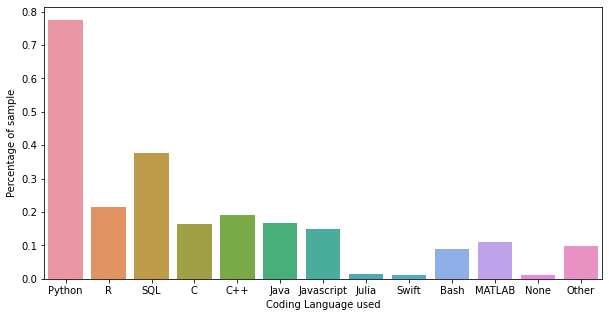

In [6]:
breakdown_main(df1=df,questionnNumber='Q7',question_dict=question_dict, percent=True)
#plt.title('Percentage of sample using each Coding Language')
plt.xlabel('Coding Language used')
plt.ylabel('Percentage of sample') 

## Languages used by data scientists

The use of R, Sql and Python appear to be higher higher in the data scientist population than in the general data analysis population.


works


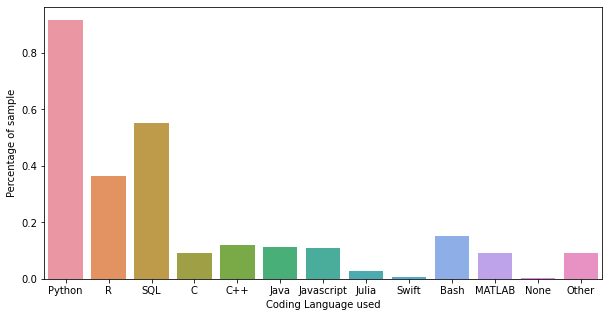

In [8]:
breakdown_main(df1=df[df['Q5']=='Data Scientist'],questionnNumber='Q7',question_dict=question_dict, percent=True)
#plt.title('Percentage of sample using each Coding Language')
plt.xlabel('Coding Language used')
plt.ylabel('Percentage of sample');

## Use of Python in different roles

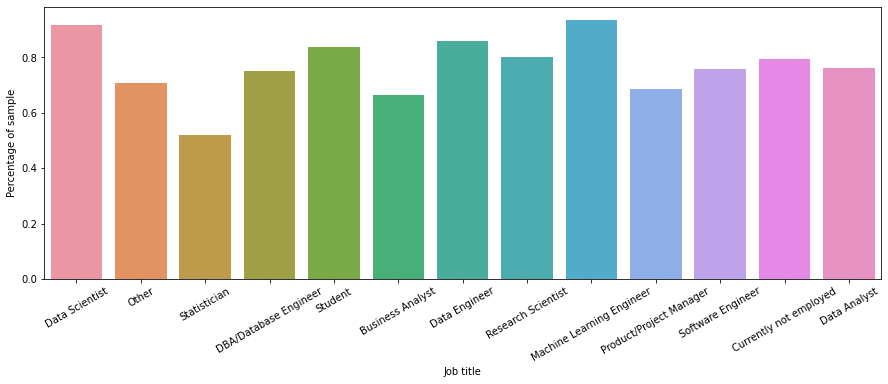

In [9]:
    dict_of_prof = {}
    for x in set(df.iloc[1:,:]['Q5']):
        if str(x) !='nan':
            dict_of_prof[x] = (df[df['Q5']==x]['Q7_Part_1'].isnull()==False).mean()
        
        

    keys = list(dict_of_prof.keys())
    # get values in the same order as keys, and parse percentage values
    vals = [float(dict_of_prof[k]) for k in keys]
    plt.figure(figsize=(15,5))
    #sns.barplot(x=keys, y=vals ) 
    g = sns.barplot(x=keys, y=vals)
    plt.xlabel('Job title')
    plt.ylabel('Percentage of sample')
    g.set_xticklabels(rotation=30, labels = keys);

# Machine learning

In [10]:
list_of_question_numbers = []

for col, i in zip(df.columns,range(df.shape[1])):
    
    for x in df.iloc[0, i].split(' '):
        if x.lower() == 'machine':
            
            #print(col," : ",df.iloc[0, i])
            list_of_question_numbers.append(col)
            
list_of_question_numbers = list(set([x.split('_')[0] for x in list_of_question_numbers]))

In [11]:
list_of_question_numbers

['Q34', 'Q15', 'Q25', 'Q16', 'Q28', 'Q35', 'Q23', 'Q22', 'Q36', 'Q33']

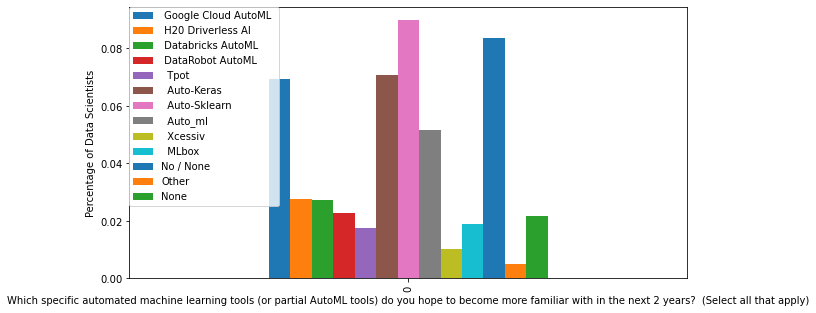

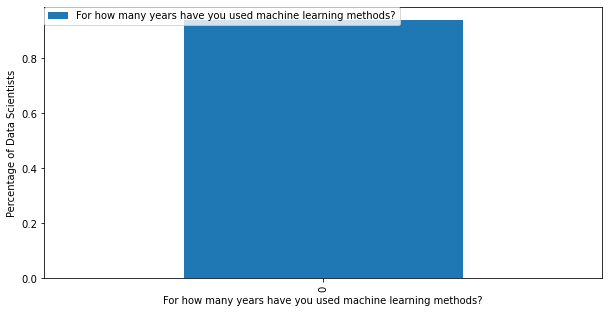

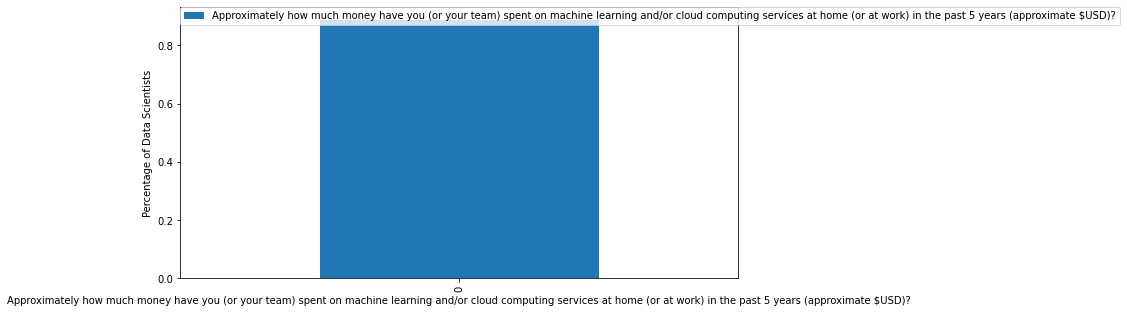

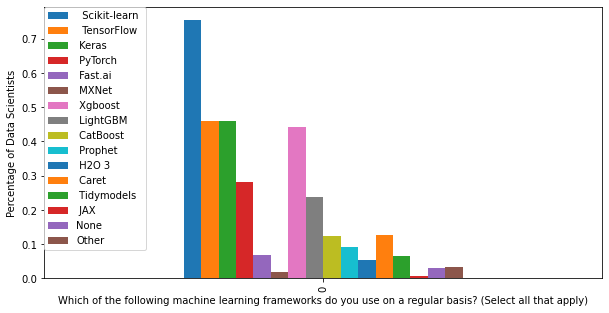

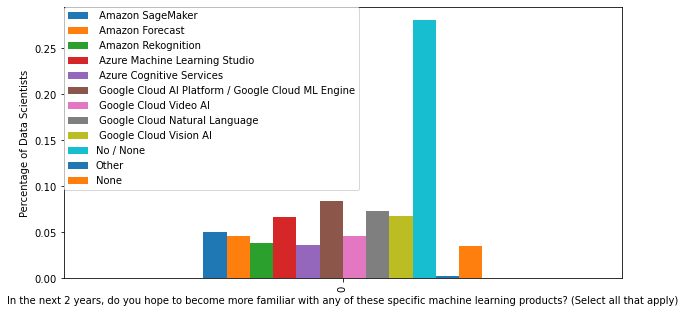

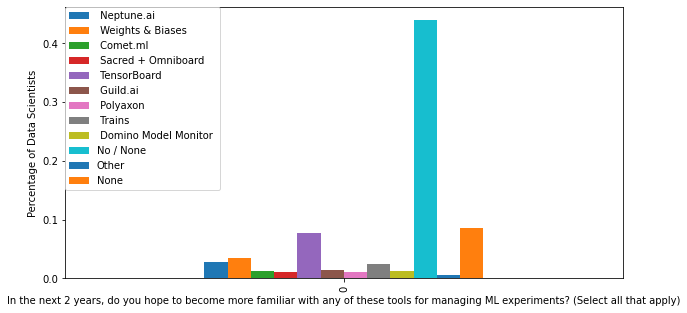

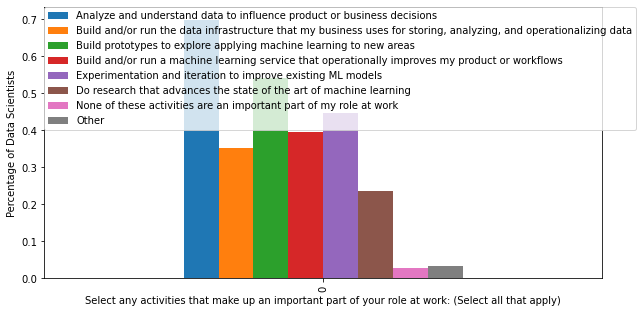

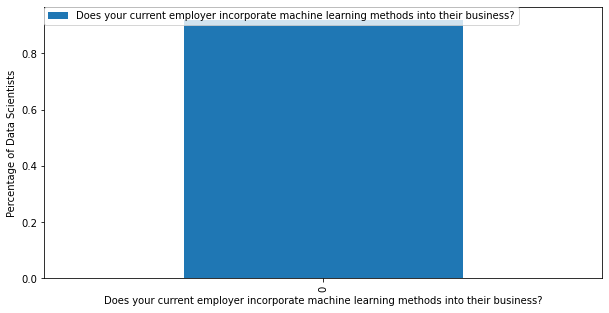

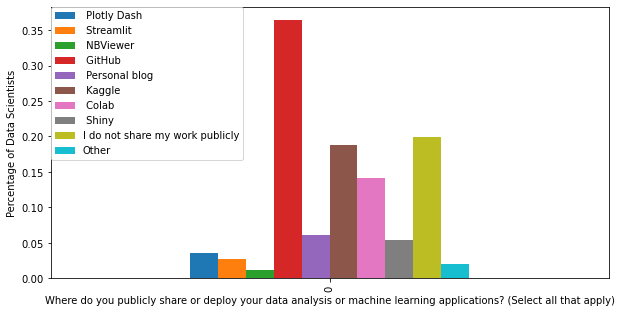

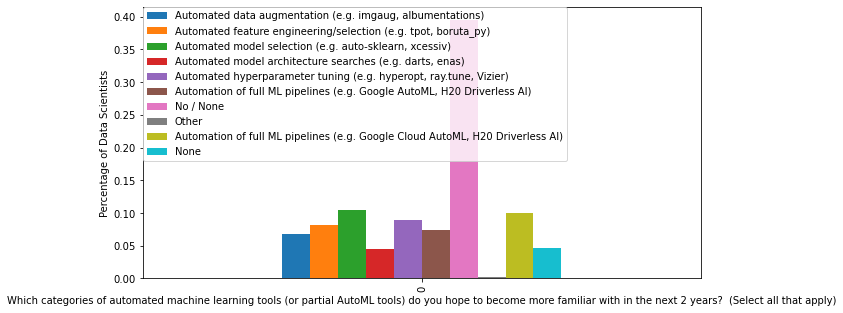

In [84]:
list_of_charts = []
for q_number in list_of_question_numbers:
    dictionary_internal_number = {}
    question_asked = ""
    for x in df.columns :
   
        if str(x[0:len(q_number)]) == q_number:
            dictionary_internal_number[question_dict[x].split(" - ")[-1]]=(df[df['Q5']=='Data Scientist'][x].isnull()==False).mean()
            question_asked = question_dict[x].split(" - ")[0]

    df2 = pd.DataFrame([dictionary_internal_number])
    ax = df2.plot(kind="bar", figsize = (10,5))
    ax.set_xlabel(question_asked)
    ax.set_ylabel("Percentage of Data Scientists")
    plt.legend(loc='upper left', borderaxespad=0.)
    #ax.xaxis.set_visible(False)

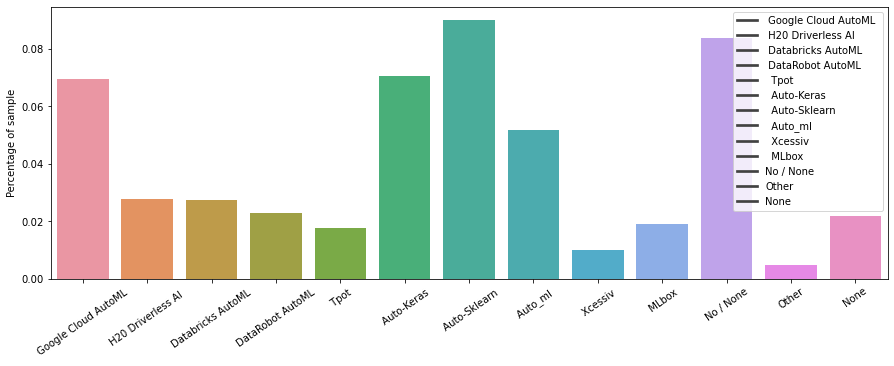

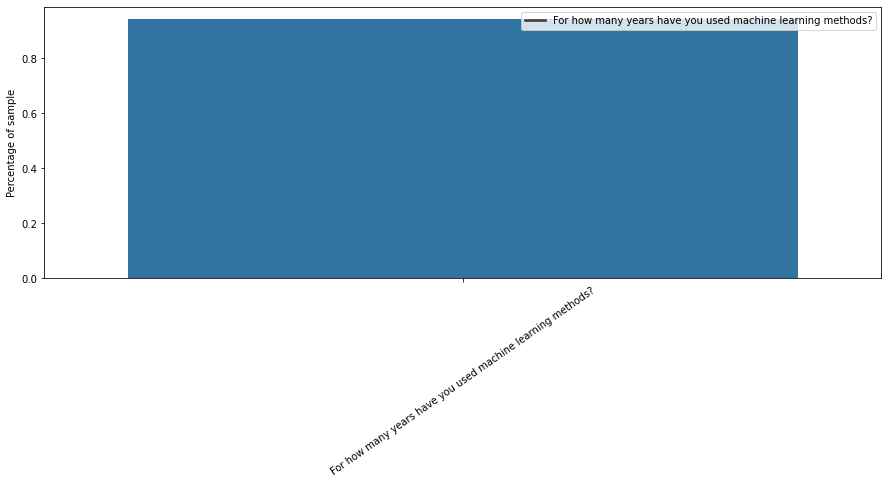

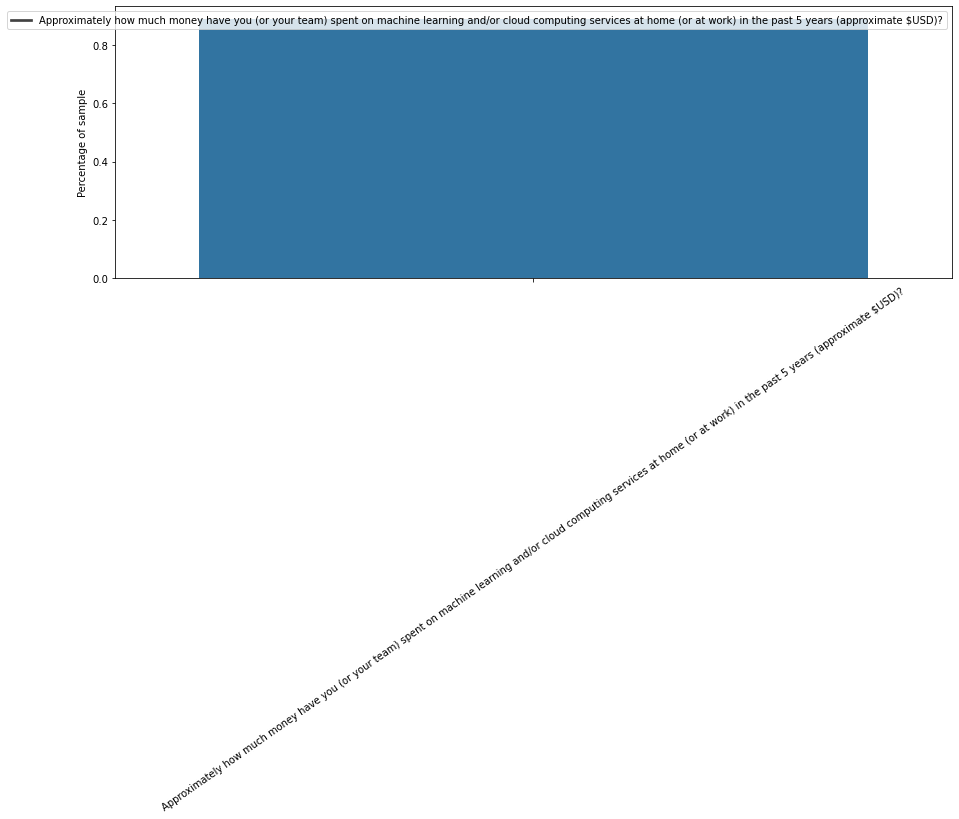

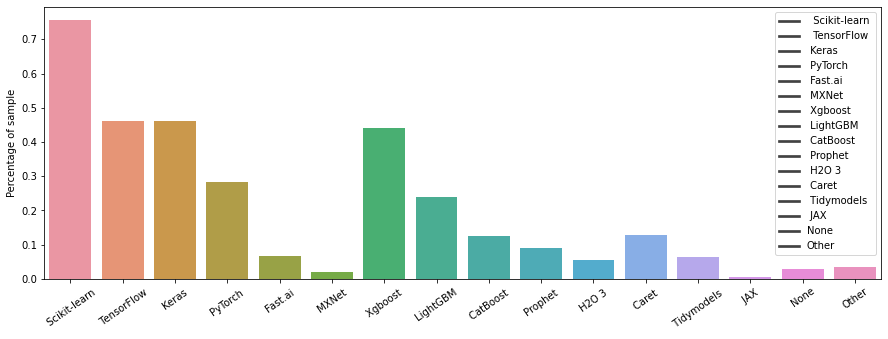

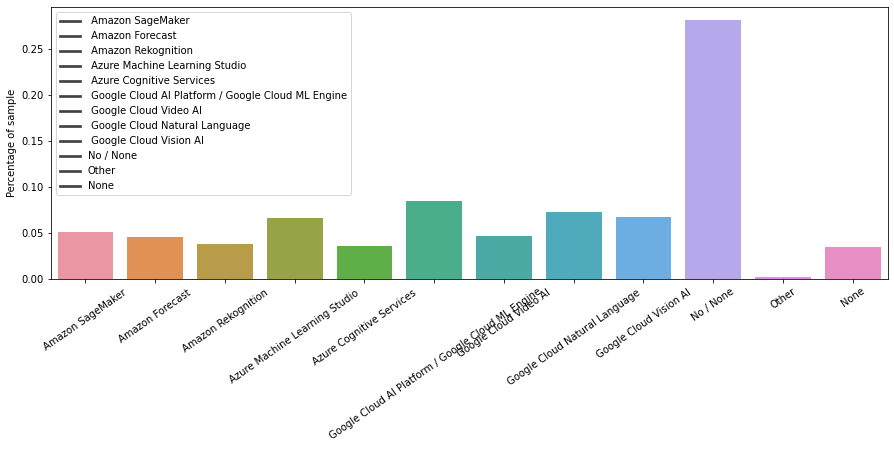

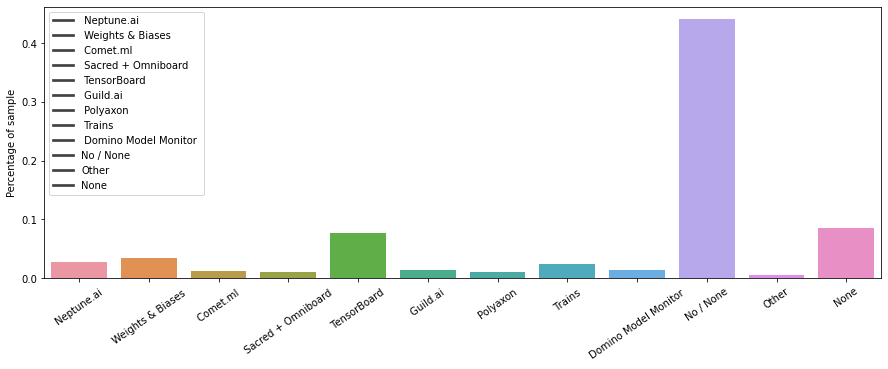

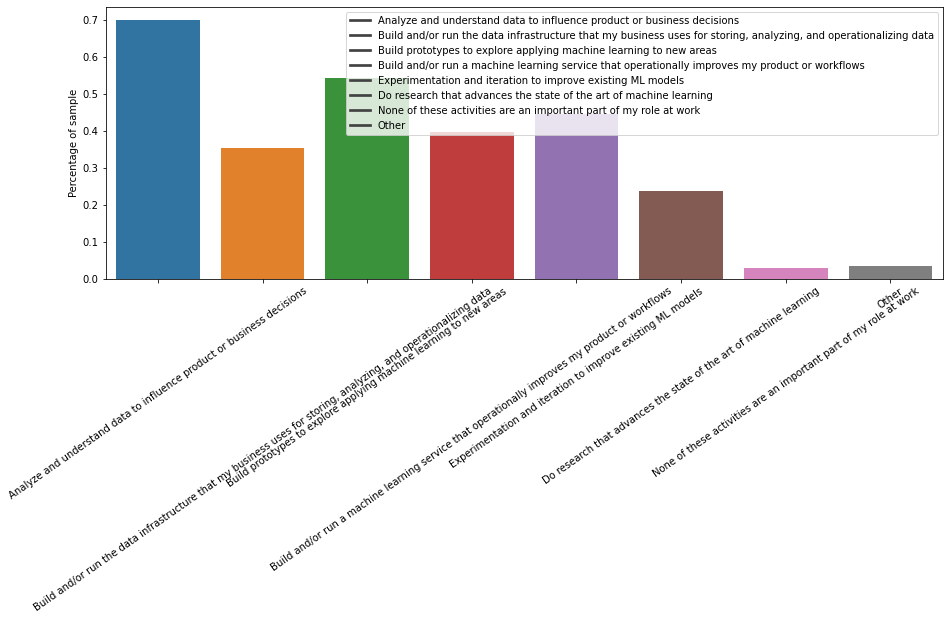

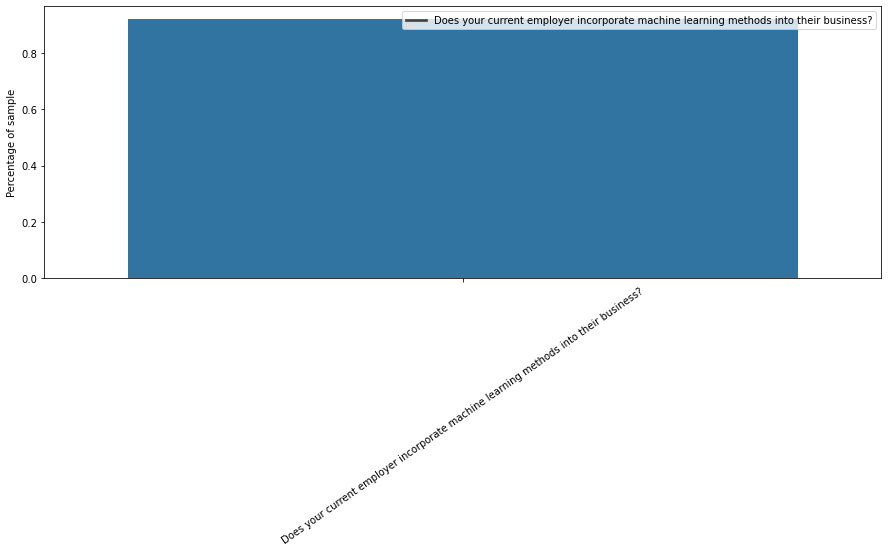

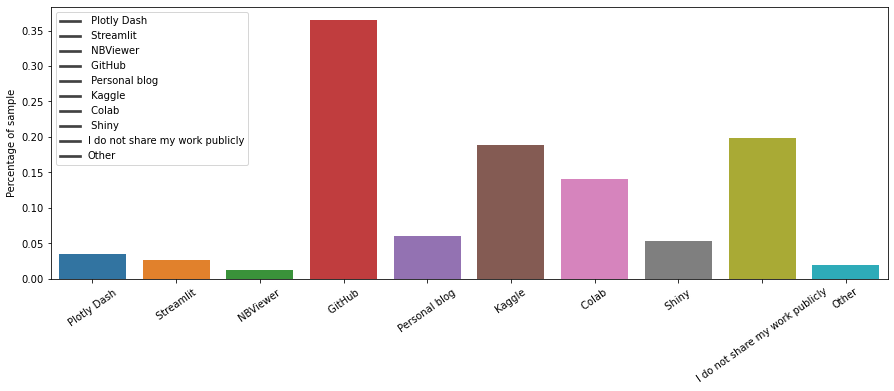

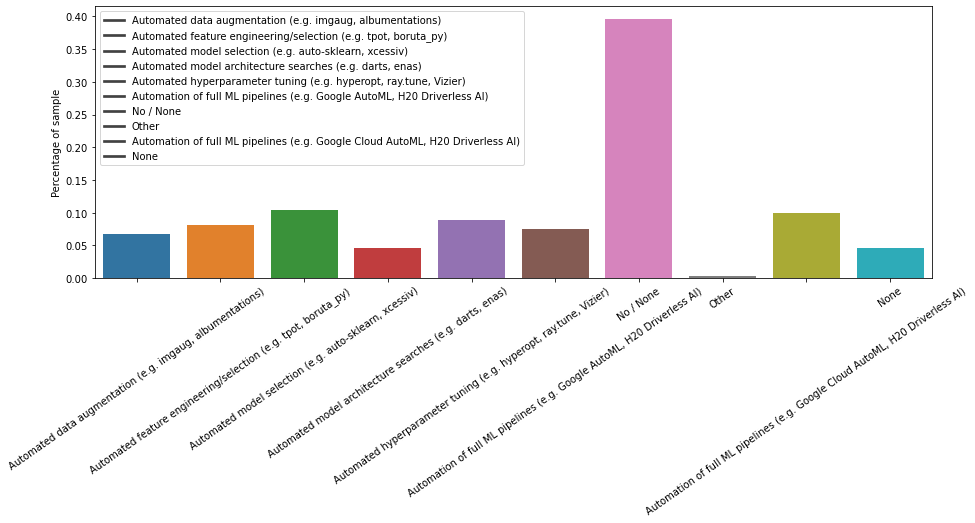

In [85]:
list_of_charts = []
for q_number in list_of_question_numbers:
    dictionary_internal_number = {}
    question_asked = ""
    for x in df.columns :
   
        if str(x[0:len(q_number)]) == q_number:
            dictionary_internal_number[question_dict[x].split(" - ")[-1]]=(df[df['Q5']=='Data Scientist'][x].isnull()==False).mean()
            question_asked = question_dict[x].split(" - ")[0]
            
    
    keys = list(dictionary_internal_number.keys())
    # get values in the same order as keys, and parse percentage values
    vals = [float(dictionary_internal_number[k]) for k in keys]
    plt.figure(figsize=(15,5))
    #sns.barplot(x=keys, y=vals ) 
    g = sns.barplot(x=keys, y=vals, orient='v')
    plt.xlabel(question_asked)
    plt.legend(keys)
    plt.ylabel('Percentage of sample')
    g.set_xticklabels(rotation=35, labels = keys);
    g.xaxis.label.set_visible(False)
    #plt.legend([vals], keys)